In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#define relative path to dataset
path_train = '../data/external/sign_mnist_train.csv'
path_test = '../data/external/sign_mnist_test.csv'

#define image resolution 
res = (28,28)

In [3]:
#saving data into pandas dataframes 
train = pd.read_csv(path_train)
test = pd.read_csv(path_test)

In [4]:
#printing shape
print(f'Train Shape:{train.shape}')
print(f'Test Shape:{test.shape}')

Train Shape:(27455, 785)
Test Shape:(7172, 785)


In [5]:
#training data 
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]

#testing data
X_test = test.iloc[:,1:]
y_test = test.iloc[:,0]

In [6]:

#fuction to find the indices given a label 
def find_indices(data,label):
    #check if data is numpy array
    if type(data) == np.ndarray:
        #return indices
        return np.where(data==label)
    #check if data is pandas series 
    elif type(data) == pd.Series:
        #return indices
        return data[data==label].index
    #else not supported in this function
    else:
        raise Exception('Not supported data type for this function.')
     

In [7]:

#letters
letters = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
#numbers 
numbers = sorted(list(y_train.unique()))
#dictionary of labels 
labels = dict(zip(numbers,letters))

In [8]:

#fuction to find the indices given a label 
def find_indices(data,label):
    #check if data is numpy array
    if type(data) == np.ndarray:
        #return indices
        return np.where(data==label)
    #check if data is pandas series 
    elif type(data) == pd.Series:
        #return indices
        return data[data==label].index
    #else not supported in this function
    else:
        raise Exception('Not supported data type for this function.')

In [9]:
#standardized data 
#using sklearn standard scaler model and fitting on training data 
sc = StandardScaler().fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [10]:
# Initialize t-SNE object
tsne = TSNE(n_components=2, random_state=0)
# Apply t-SNE to data
tsne_res = tsne.fit_transform(train)


C:\Users\15513\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\15513\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


C:\Users\15513\AppData\Local\Temp\ipykernel_4068\763857153.py:4: UserWarning: 
The palette list has fewer values (10) than needed (24) and will cycle, which may produce an uninterpretable plot.
  ax= sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = train['label'], palette = sns.hls_palette(10), legend = 'full')


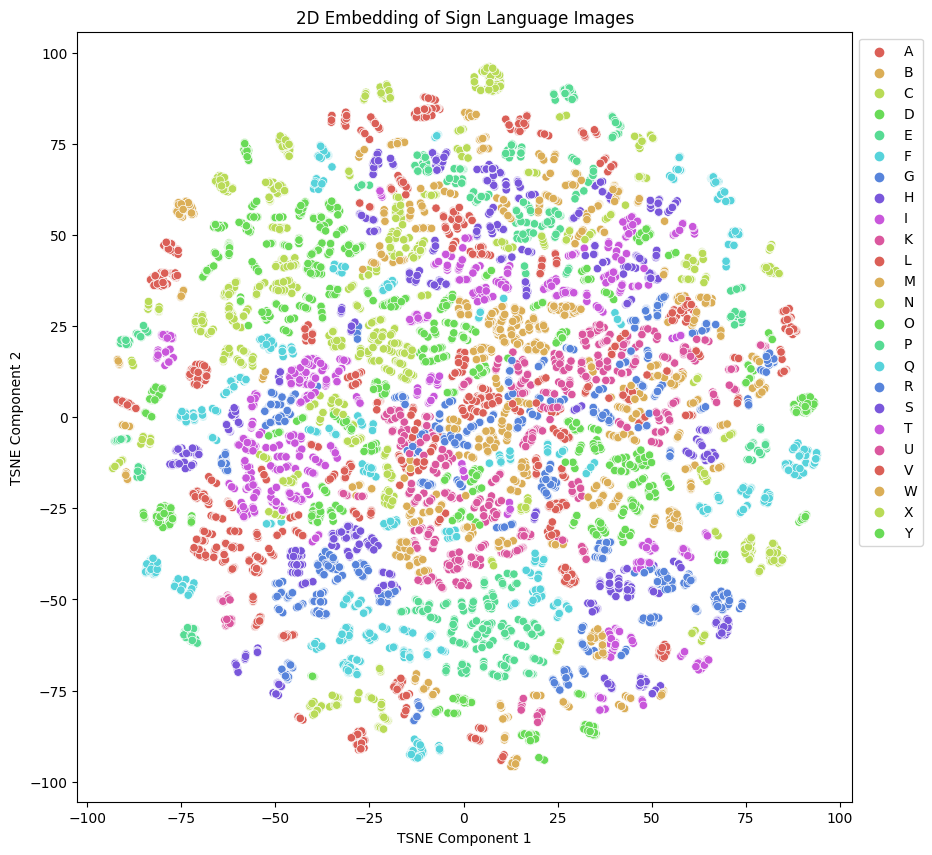

In [11]:
# Plot t-SNE results
fig, ax = plt.subplots(figsize = (10,10))

ax= sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = train['label'], palette = sns.hls_palette(10), legend = 'full')
handler, _ = ax.get_legend_handles_labels();

plt.legend(handler, letters, bbox_to_anchor = (1, 1));
#title
plt.title('2D Embedding of Sign Language Images')
#x-axis label
plt.xlabel('TSNE Component 1');
#y-axis label
plt.ylabel('TSNE Component 2');